In [118]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.

In [119]:
states_max = 100

def value_iteration_for_gamblers(p_h, theta=0.0001, gamma=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        
        A = np.zeros(s)

        # for each possible action
        for a in range(1, s):
            
            win  = min(states_max, s+a)
            loss = max(0, s-a)
            
            # compute  value
            A[a] = p_h * (rewards[win] + gamma * V[win]) + (1 - p_h) * (rewards[loss] + gamma * V[loss])
        
        return A
        

    V = np.zeros(states_max+1)
    rewards = np.zeros(states_max+1)
    rewards[-1] = 1
    B = np.zeros(states_max)
    
    # Loop for a large, finite number of iterations
    for i in range(2**12):
    
        # Reinitialize delta
        delta = 0
    
        # Loop over all states
        for s in range(1, states_max):

            # Compute best action value
            A = one_step_lookahead(s, V, rewards)
            v = np.max(A)
            
            # Save best action as policy for s
            B[s] = np.argmax(A)
            
            # Get maximum change in iteration
            delta = max(delta, abs(v - V[s]))
            
            # Update value function
            V[s] = v

        # If insufficient change, we have converged
        if delta < theta:
            print(f'Converged after {i} iterations using p_h = {p_h}.\n')
            break
    
    return B, V
    #return policy, V

Running...
Converged after 6 iterations using p_h = 0.25.

Optimized Policy:
[  0.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.   3.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  49.  48.  47.  46.  45.  44.  43.  42.  41.
  40.  39.  38.  37.  36.  35.  34.  33.  32.  31.  30.  29.  28.  27.  26.
  25.  24.  23.  22.  21.  20.  19.  18.  17.  16.  15.  14.  13.  12.  11.
  10.   9.   8.   7.   6.   5.   4.   3.   2.   1.]

Optimized Value Function:
[  0.00000000e+00   0.00000000e+00   6.10351562e-05   2.89916992e-04
   7.44819641e-04   1.15966797e-03   1.78837776e-03   2.97927856e-03
   4.08935547e-03   4.67300415e-03   5.67722321e-03   7.17885792e-03
   9.09274817e-03   1.19171143e-02   1.57051086e-02   1.63574219e-02
   1.70869827e-02   1.87187465e-02   2.03933486e-02   2.27088928e-02
   2.74810791e-02   2.87377092e-02   3.1266

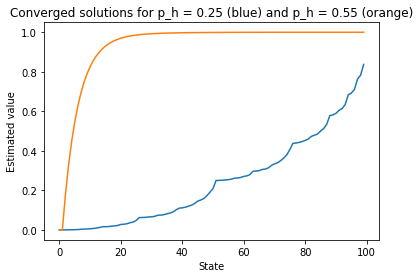

In [110]:
def run(p_h = 0.25):
    print('Running...')
    
    policy, v = value_iteration_for_gamblers(p_h)
    print(f'Optimized Policy:\n{policy}\n\nOptimized Value Function:\n{v}\n')
    
    plt.plot(range(states_max), v[:100])
    plt.title(f'Converged solutions for p_h = 0.25 (blue) and p_h = 0.55 (orange)')
    plt.xlabel('State')
    plt.ylabel('Estimated value')

run()
run(0.55)

Converged after 6 iterations using p_h = 0.25.

Converged after 508 iterations using p_h = 0.55.



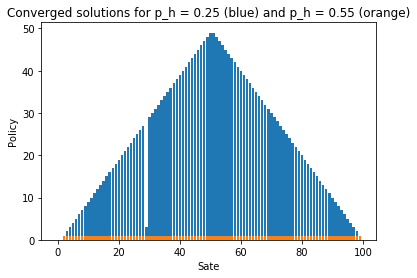

In [117]:
def run2(p_h = 0.25):
    
    policy, v = value_iteration_for_gamblers(p_h)
    
    plt.bar(range(100), policy)
    plt.title('Converged solutions for p_h = 0.25 (blue) and p_h = 0.55 (orange)')
    plt.xlabel('Sate')
    plt.ylabel('Policy')


run2()
run2(p_h=0.55)